<a href="https://colab.research.google.com/github/SaiPallavi7989/Python/blob/main/Caloric_Based_Food_Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CALORIC-BASED FOOD RECOMMENDATIONS**



In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

# Categorized meals based on caloric value

---




In [62]:
df = pd.read_csv('newfile2.csv', encoding="latin-1")
df.info()

# Define the function to categorize meals based on caloric value
def categorize_meal(calories):
    if 550 <= calories <= 700:
        return 'HEAVY MEAL'
    elif 500 <= calories < 550:
        return 'MEDIUM MEAL'
    elif 400 <= calories < 500:
        return 'LIGHT MEAL'
    elif 300 <= calories < 400:
        return 'SNACK-1'
    elif 0 < calories <= 300:
        return 'SNACK-2'
# create a new column
df['MEAL_CATEGORY'] = df['CALORIC_VALUE'].apply(categorize_meal)

# convert strings into upper case
df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)
print(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FOOD_ITEM             179 non-null    object 
 1   FOOD_GROUP            179 non-null    object 
 2   SERVING_SIZE (in g)   179 non-null    float64
 3   CALORIC_VALUE         179 non-null    float64
 4   PROTEIN (in g)        178 non-null    float64
 5   FAT (in g)            179 non-null    float64
 6   CARBOHYDRATES (in g)  179 non-null    float64
 7   DIETARY_FIBER (in g)  179 non-null    float64
 8   SUGARS (in g)         179 non-null    float64
 9   SODIUM (in g)         179 non-null    float64
 10  CHOLESTROL (in mg)    179 non-null    float64
 11  VITAMIN B6 (in %)     179 non-null    float64
 12  VITAMIN B12 (in %)    179 non-null    int64  
 13  VITAMIN C (in %)      179 non-null    float64
 14  VITAMIN D (in %)      179 non-null    int64  
 15  VITAMIN E (in %)      1

<ipython-input-62-755d427bf6ee>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)


# Univariate Analysis through Histogram

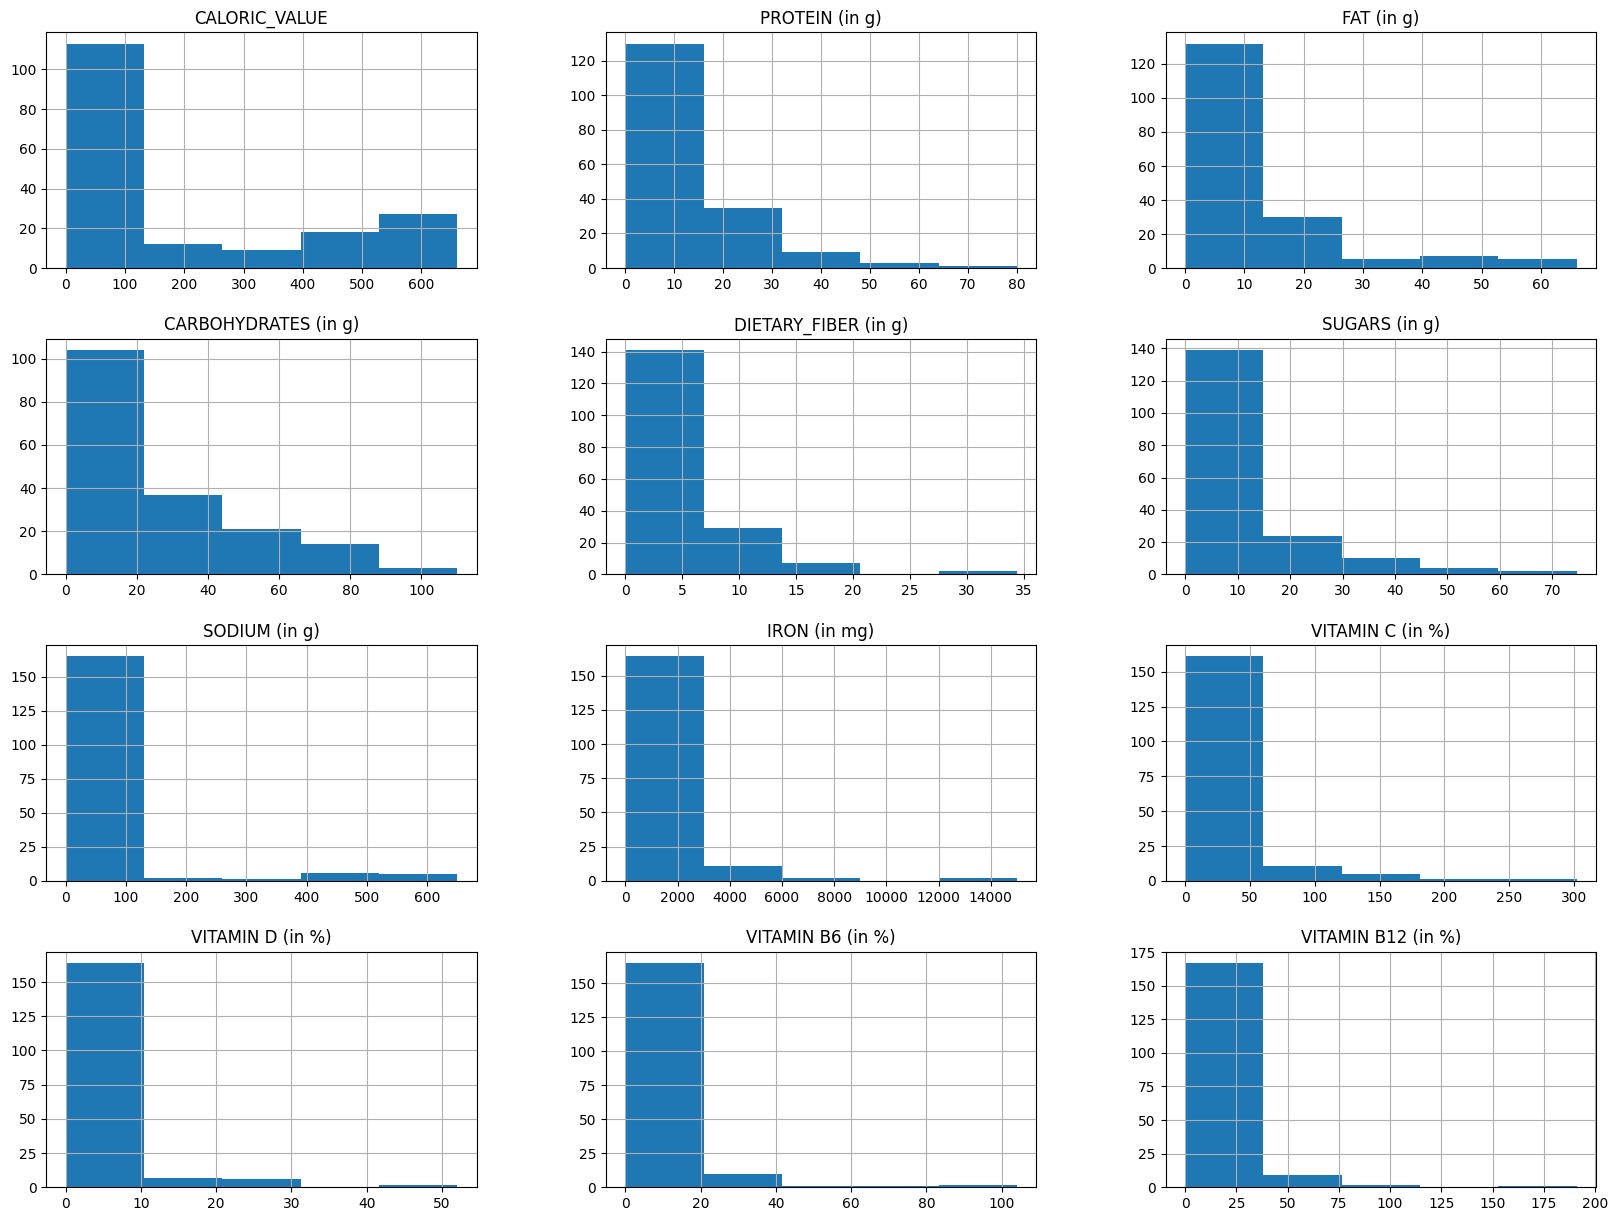

In [63]:
numerical_cols = ['CALORIC_VALUE','PROTEIN (in g)','FAT (in g)','CARBOHYDRATES (in g)','DIETARY_FIBER (in g)','SUGARS (in g)','SODIUM (in g)',
                  'IRON (in mg)','VITAMIN C (in %)','VITAMIN D (in %)','VITAMIN B6 (in %)','VITAMIN B12 (in %)']
df[numerical_cols].hist(bins=5,figsize=(20, 15))#univariate analysis
plt.show()

# Bivariate Analysis through Pairplot

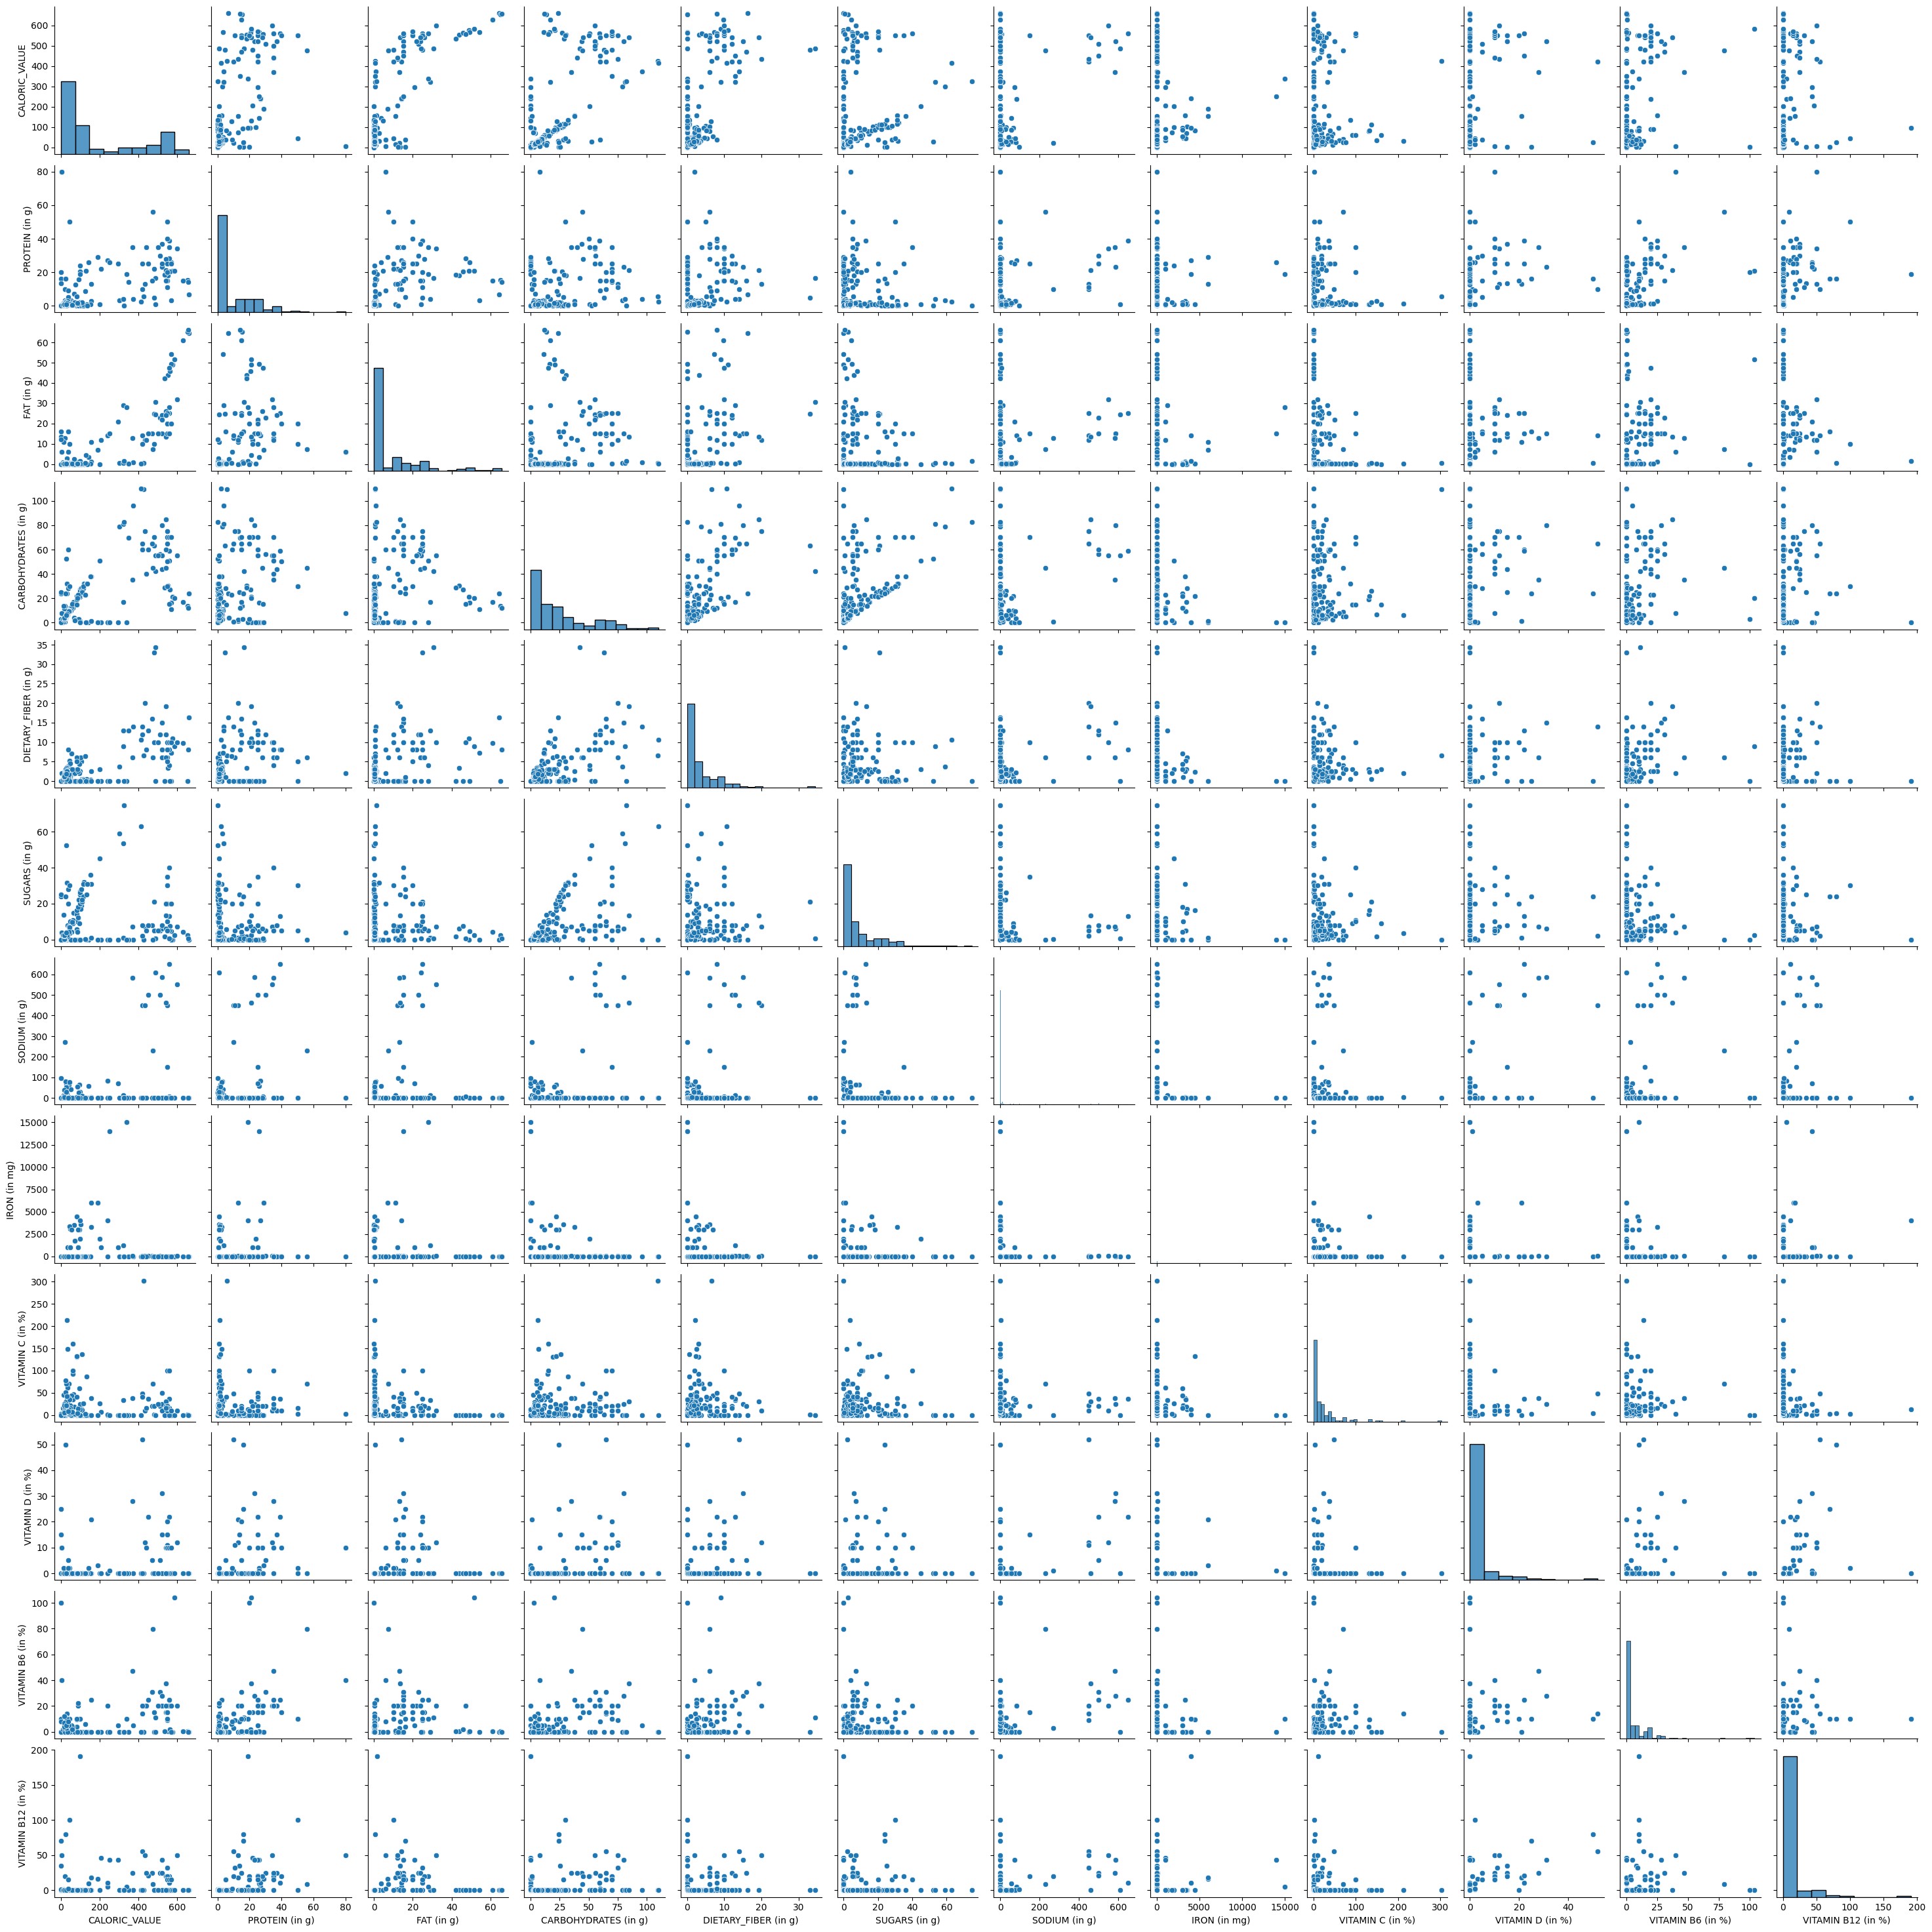

In [55]:
sns.pairplot(df[numerical_cols]) #bivariate analysis
plt.show()

# Correlation Between Numerical Columns

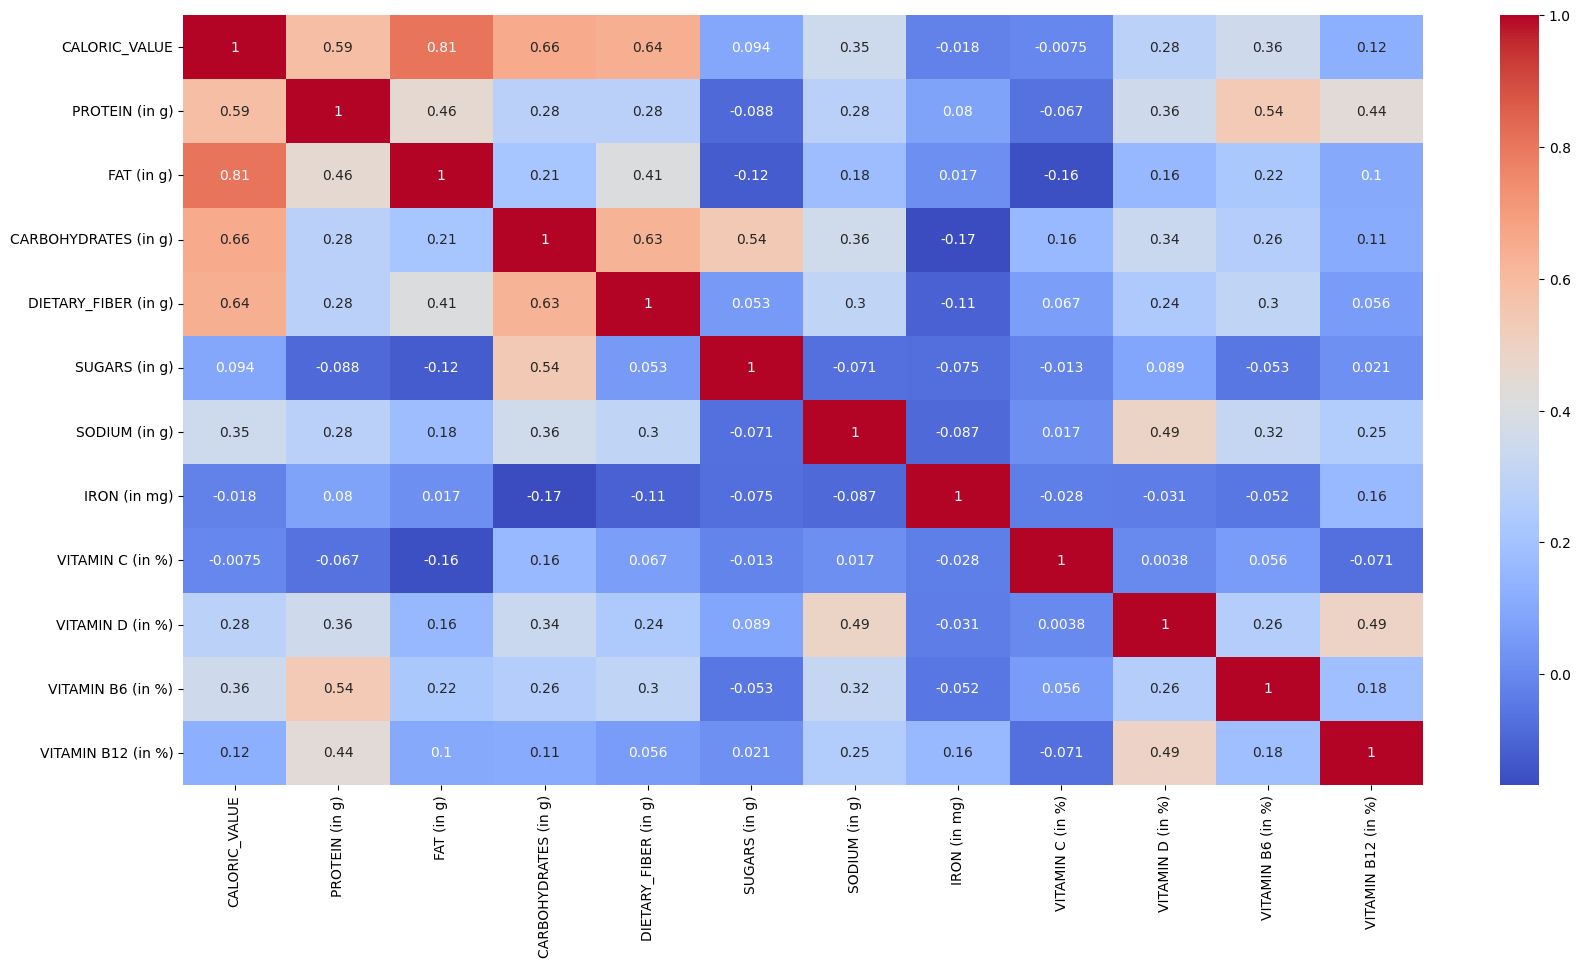

In [56]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# ONE HOT ENCODING

In [64]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['MEAL_CATEGORY']
one_hot_encoder = OneHotEncoder()
encoded_features = one_hot_encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=one_hot_encoder.get_feature_names_out(categorical_cols))
df = pd.concat([df, encoded_df], axis=1)
print(df)


                                             FOOD_ITEM         FOOD_GROUP  \
0                                                 FIGS  DRY FRUITS, SEEDS   
1                                            CURRANTS   DRY FRUITS, SEEDS   
2                                             CHICKEN                MEAT   
3                                        GOJI BERRIES   DRY FRUITS, SEEDS   
4                                             COCONUT   DRY FRUITS, SEEDS   
..                                                 ...                ...   
174                 EGG WHITE OMELETTE WITH VEGETABLES              MEALS   
175                        SWEET POTATO HASH WITH EGGS              MEALS   
176                    FRUIT SALAD WITH COTTAGE CHEESE              MEALS   
177                              QUINOA BREAKFAST BOWL             MEALS    
178  WHOLE GRAIN TOAST WITH ALMOND BUTTER AND BANAN...             MEALS    

     SERVING_SIZE (in g)  CALORIC_VALUE  PROTEIN (in g)  FAT (in g)  \
0   

# Drop Columns having Null Values

In [65]:
zero_count = (df['MEAL_CATEGORY_None'] == 0).sum()
print(zero_count)
df.drop(['MEAL_CATEGORY'], axis=1, inplace=True)
df.drop(['MEAL_CATEGORY_None'], axis=1, inplace=True)
print(df)

178
                                             FOOD_ITEM         FOOD_GROUP  \
0                                                 FIGS  DRY FRUITS, SEEDS   
1                                            CURRANTS   DRY FRUITS, SEEDS   
2                                             CHICKEN                MEAT   
3                                        GOJI BERRIES   DRY FRUITS, SEEDS   
4                                             COCONUT   DRY FRUITS, SEEDS   
..                                                 ...                ...   
174                 EGG WHITE OMELETTE WITH VEGETABLES              MEALS   
175                        SWEET POTATO HASH WITH EGGS              MEALS   
176                    FRUIT SALAD WITH COTTAGE CHEESE              MEALS   
177                              QUINOA BREAKFAST BOWL             MEALS    
178  WHOLE GRAIN TOAST WITH ALMOND BUTTER AND BANAN...             MEALS    

     SERVING_SIZE (in g)  CALORIC_VALUE  PROTEIN (in g)  FAT (in g)  \


# NORMALIZATION-To convert into Binary values

In [66]:
from sklearn import preprocessing
df[numerical_cols]=df[numerical_cols].fillna(0)
x=df[numerical_cols].values
normalized_arr = preprocessing.normalize(x)
print(normalized_arr)


[[0.9678154  0.01035097 0.00232897 ... 0.         0.01293871 0.        ]
 [0.79763956 0.01069775 0.00112608 ... 0.         0.         0.        ]
 [0.93568057 0.1057045  0.05480974 ... 0.         0.07829963 0.01957491]
 ...
 [0.97130906 0.06070682 0.02601721 ... 0.0173448  0.03468961 0.02601721]
 [0.98898882 0.0433767  0.03470136 ... 0.01735068 0.03470136 0.02602602]
 [0.9905572  0.02751548 0.04402476 ... 0.         0.0366873  0.        ]]


# DIMENSIONALITY REDUCTION USING PCA

In [67]:
pca = PCA(n_components=2)  # Reduce to 2 components for illustration
pca_features = pca.fit_transform(normalized_arr)
# Combine all features into a single feature set
features = np.hstack([pca_features, encoded_features.toarray()])

# Fitting K-NN Algorithm for Accurate Results

In [68]:
# Fit k-NN Algorithm
knn = NearestNeighbors(n_neighbors=5, algorithm='auto')
knn.fit(features)

NearestNeighbors()

# Recommendations of Food Based on Calories

In [71]:
from sklearn.neighbors import NearestNeighbors
# Extract relevant nutritional columns for kNN
nutritional_columns = [
 'CALORIC_VALUE', 'PROTEIN (in g)', 'FAT (in g)', 'CARBOHYDRATES (in g)',
   'DIETARY_FIBER (in g)', 'SUGARS (in g)', 'SODIUM (in g)'
]
X = df[nutritional_columns].fillna(0)  # Fill any missing values with 0

# Function to find similar food items using kNN
def find_similar_food_items(food_item, k=5):
    food_index = df[df['FOOD_ITEM'] == food_item].index[0]
    food_features = X.loc[food_index].values.reshape(1, -1)
    distances, indices = knn.kneighbors(features)
    return df.iloc[indices[0]]

# Extract food items and their caloric values into a dictionary
meal_categories = {row['FOOD_ITEM']: row['CALORIC_VALUE'] for index, row in df.iterrows()}

# Function to generate random food items ensuring different categories are picked
def generate_random_food_items_different_categories(total_caloric_value):
    selected_items = []
    categories = list(meal_categories.keys())
    random.shuffle(categories)

    while total_caloric_value > 0 and len(selected_items) < 5 and categories:
        category = categories.pop()
        if total_caloric_value >= meal_categories[category]:
            selected_items.append(category)
            total_caloric_value -= meal_categories[category]

    return selected_items
# Function to generate and display bulk meal plan
def display_bulk_meal_plan():
    for day in range(1, 8):
        bulk_items = generate_random_food_items_different_categories(2300)
        print(f"Day {day} Recommended Foods for Bulk Body:")
        print(bulk_items)
        print()
        if bulk_items:
            print(f"Similar items to {bulk_items[0]}:")
            similar_items = find_similar_food_items(bulk_items[0])
            print(similar_items[['FOOD_ITEM', 'CALORIC_VALUE']])
            print()
# Function to generate and display maintenance meal plan
def display_maintenance_meal_plan():
    for day in range(1, 8):
        maintenance_items = generate_random_food_items_different_categories(2000)
        print(f"Day {day} Recommended Foods for Maintenance body:")
        print(maintenance_items)
        print()
        if maintenance_items:
            print(f"Similar items to {maintenance_items[0]}:")
            similar_items = find_similar_food_items(maintenance_items[0])
            print(similar_items[['FOOD_ITEM', 'CALORIC_VALUE']])
            print()
# Function to generate and display lean meal plan
def display_lean_meal_plan():
    for day in range(1, 8):
        lean_items = generate_random_food_items_different_categories(1800)
        print(f"Day {day} Recommended Foods for Lean Body:")
        print(lean_items)
        print()
        if lean_items:
            print(f"Similar items to {lean_items[0]}:")
            similar_items = find_similar_food_items(lean_items[0])
            print(similar_items[['FOOD_ITEM', 'CALORIC_VALUE']])
            print()
# Text-based menu system
def menu():
    while True:
        print("Caloric-Based Food Recommendations")
        print("1. Bulk Body")
        print("2. Maintenance Body")
        print("3. Lean Body")
        print("4. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            display_bulk_meal_plan()
        elif choice == '2':
            display_maintenance_meal_plan()
        elif choice == '3':
            display_lean_meal_plan()
        elif choice == '4':
            break
        else:
            print("Invalid choice. Please try again.")
menu()

Caloric-Based Food Recommendations
1. Bulk Body
2. Maintenance Body
3. Lean Body
4. Exit
Enter your choice: 1
Day 1 Recommended Foods for Bulk Body:
['BUTTER', 'PALAK (SPINACH) AND TOFU CURRY WITH WHOLE WHEAT NAAN', 'GREEK YOUGURT', 'BANANA', 'COFFEE OR TEA']

Similar items to BUTTER:
        FOOD_ITEM  CALORIC_VALUE
0            FIGS          374.0
71       APRICOTS          320.0
3   GOJI BERRIES           349.0
68        RAISINS          300.0
73   CRANBERRIES           325.0

Day 2 Recommended Foods for Bulk Body:
['DANDELION GREENS ', 'SOYA CHUNKS CURRY WITH MILLET (BAJRA) ROTI', 'BLACKBERRY', 'RAJMA (KIDNEY BEAN CURRY) WITH QUINOA', 'SKIM MILK']

Similar items to DANDELION GREENS :
        FOOD_ITEM  CALORIC_VALUE
0            FIGS          374.0
71       APRICOTS          320.0
3   GOJI BERRIES           349.0
68        RAISINS          300.0
73   CRANBERRIES           325.0

Day 3 Recommended Foods for Bulk Body:
['BCAA+', 'CABBAGE', 'BROCCOLI RAAB', 'PALAK PANEER WITH WHOLE WH